# yfinance Library Assignment  

In [ ]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

### Function Specification: `download_historical_data`

Implement the function `download_historical_data` to fetch historical price data using Yahoo Finance as the data source. This function should be capable of fetching historical data for a specified stock symbol between given start and end dates. Additionally, it should support an optional parameter for the data timeframe with a default value of `'1d'` (daily).

---

### Function Specifications

**Parameters:**
- `symbol`: The ticker symbol of the stock (e.g., `'RELIANCE.NS'`).
- `start_date`: Start date for the data in `'YYYY-MM-DD'` format.
- `end_date`: End date for the data in `'YYYY-MM-DD'` format.
- `timeframe`: The frequency of the data (`'1d'`, `'1wk'`, `'1mo'`), default is `'1d'`.

**Return:**  
A pandas `DataFrame` containing the fetched data.


In [ ]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

def download_historical_data(symbol, start_date, end_date, timeframe='1d'):
    """
    Downloads historical stock price data from Yahoo Finance.
    """
    data = yf.download(symbol, start=start_date, end=end_date, interval=timeframe)
    data.dropna(inplace=True)
    return data


### Visualization

Create a function for plotting the stock closing prices. This function should accept parameters for the plot and its objective is to display the graph.
   


In [ ]:
def plot_closing_prices(df, symbol):
    """
    Plots the closing prices of the stock.
    """
    plt.figure(figsize=(12, 6))
    plt.plot(df['Close'], label=f"{symbol} Closing Price")
    plt.title(f"{symbol} Closing Prices")
    plt.xlabel("Date")
    plt.ylabel("Price")
    plt.legend()
    plt.grid(True)
    plt.show()


### Run the functions

**Choose Stocks:**  
   - Select any three stocks of your choice.
   - Fetch their data for the time period from **2012 to 2022**.
   - Select daily time frame i.e. 1d.

**Plot the Data:**  
   1. Plot the data for each stock separately.  
   2. Combine the data and plot all three stocks on the **same graph** for comparison.

/tmp/ipython-input-1-2761394878.py:9: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(symbol, start=start_date, end=end_date, interval=timeframe)
[*********************100%***********************]  1 of 1 completed


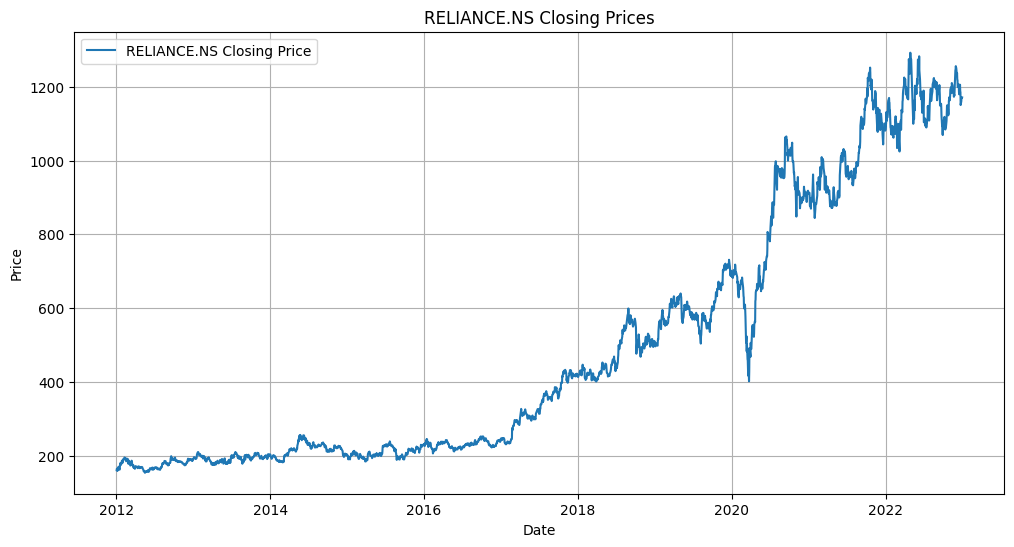

/tmp/ipython-input-1-2761394878.py:9: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(symbol, start=start_date, end=end_date, interval=timeframe)
[*********************100%***********************]  1 of 1 completed


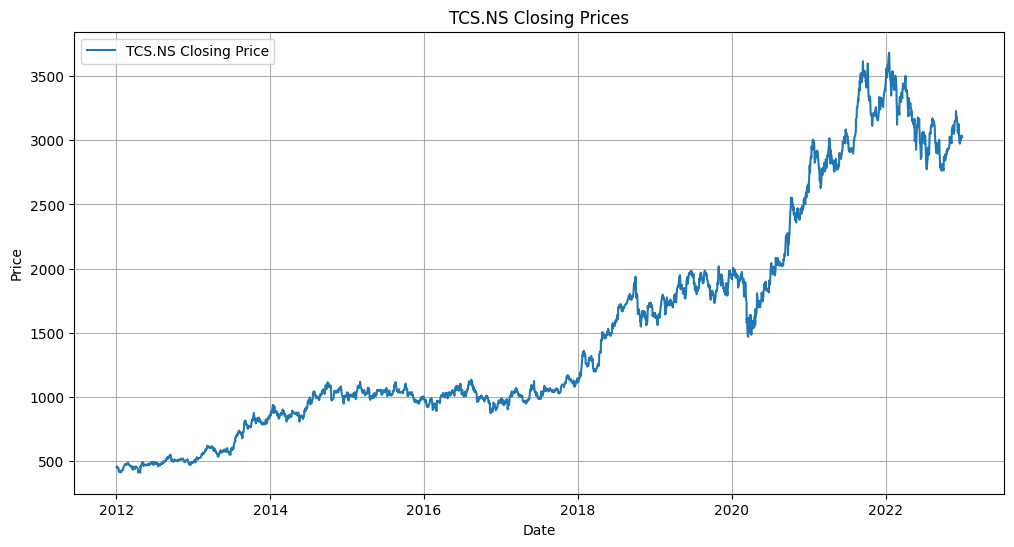

/tmp/ipython-input-1-2761394878.py:9: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(symbol, start=start_date, end=end_date, interval=timeframe)
[*********************100%***********************]  1 of 1 completed


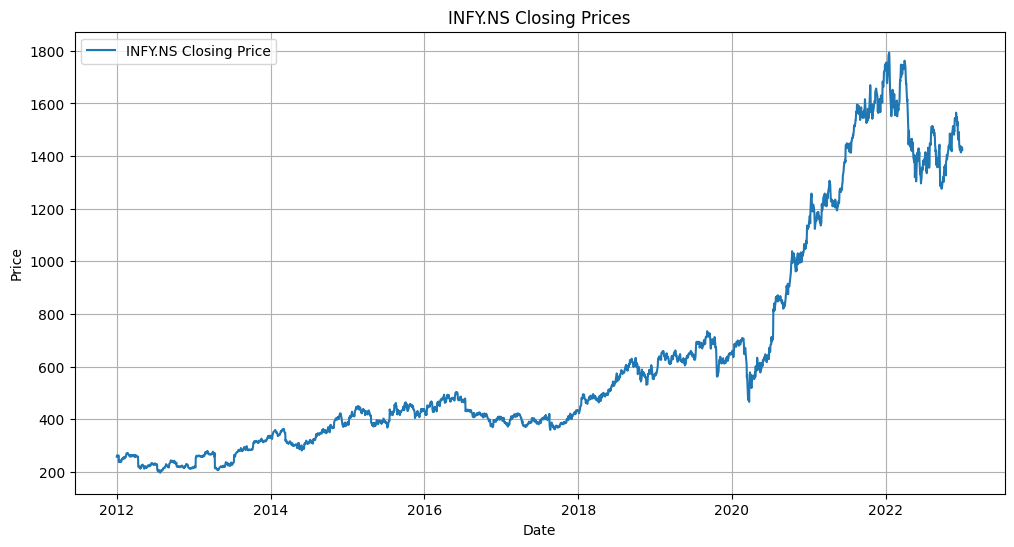

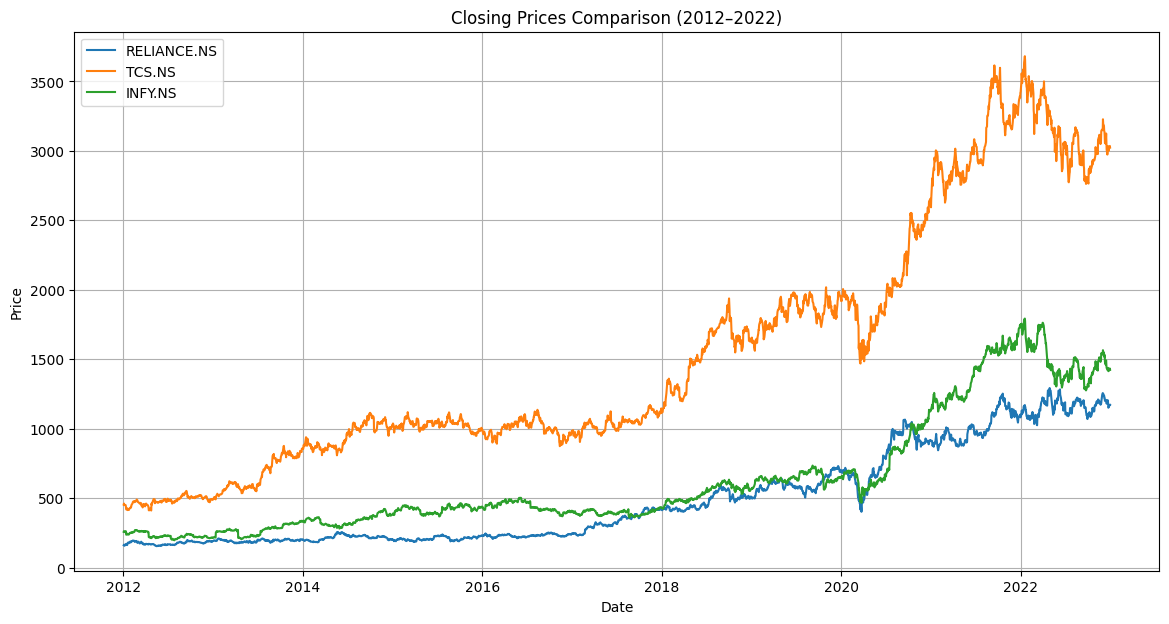

In [ ]:
# Choose three stock symbols (you can change them)
symbols = ['RELIANCE.NS', 'TCS.NS', 'INFY.NS']
start_date = '2012-01-01'
end_date = '2022-12-31'

# Dictionary to store data for each stock
stock_data = {}

# Download and plot data for each stock separately
for symbol in symbols:
    df = download_historical_data(symbol, start_date, end_date)
    stock_data[symbol] = df
    plot_closing_prices(df, symbol)
def plot_combined_closing(stock_data_dict):
    plt.figure(figsize=(14, 7))
    for symbol, df in stock_data_dict.items():
        plt.plot(df['Close'], label=symbol)

    plt.title("Closing Prices Comparison (2012–2022)")
    plt.xlabel("Date")
    plt.ylabel("Price")
    plt.legend()
    plt.grid(True)
    plt.show()

# Call the function
plot_combined_closing(stock_data)


### Technical Analysis

**Simple Moving Averages (SMA) and Exponential Moving Averages (EMA)**  
   - Plot the SMA and EMA of 5 days of each of the three stocks that you have selected.
   - SMA and EMA graph should be plotted on the same graph
   - Hence you have to plot three graphs of each stock with SMA and EMA
    

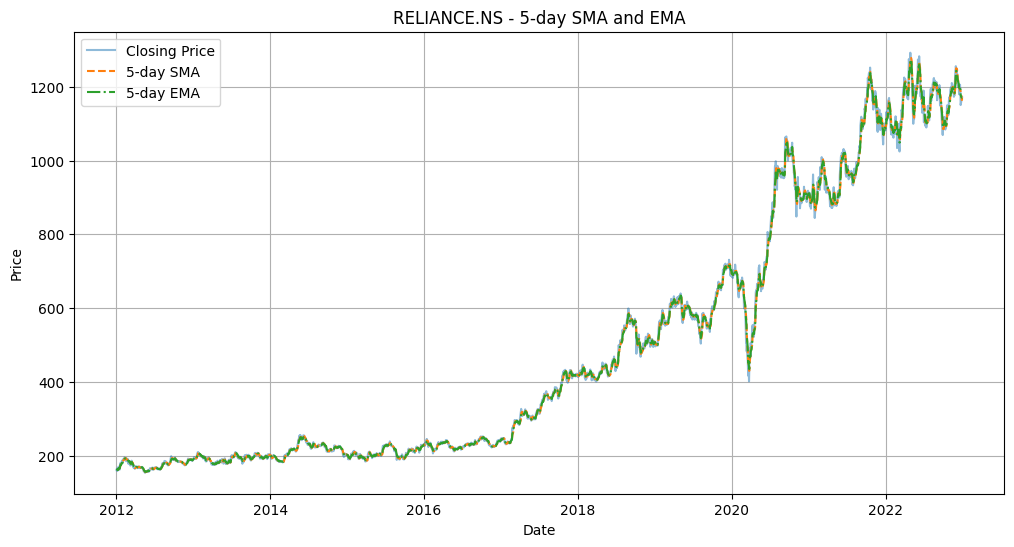

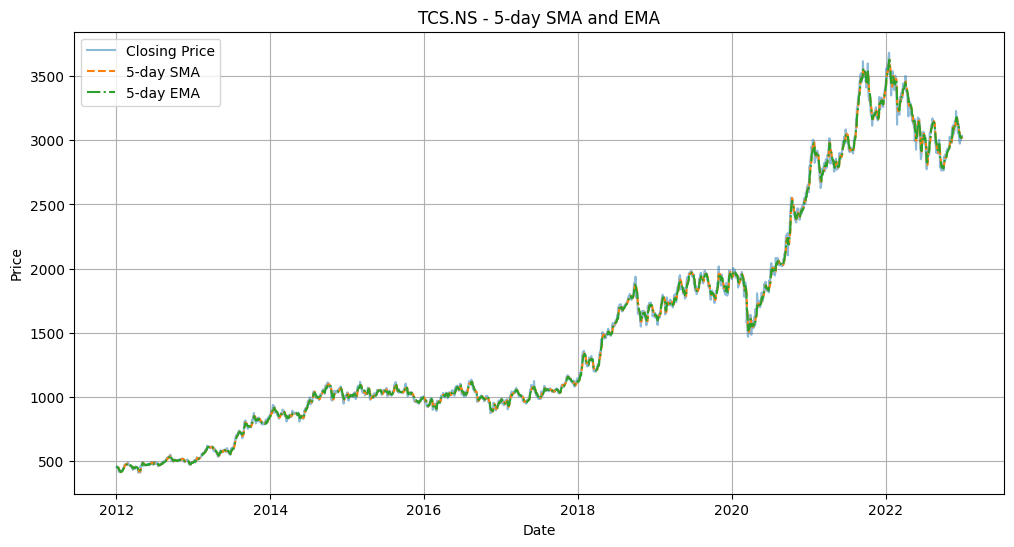

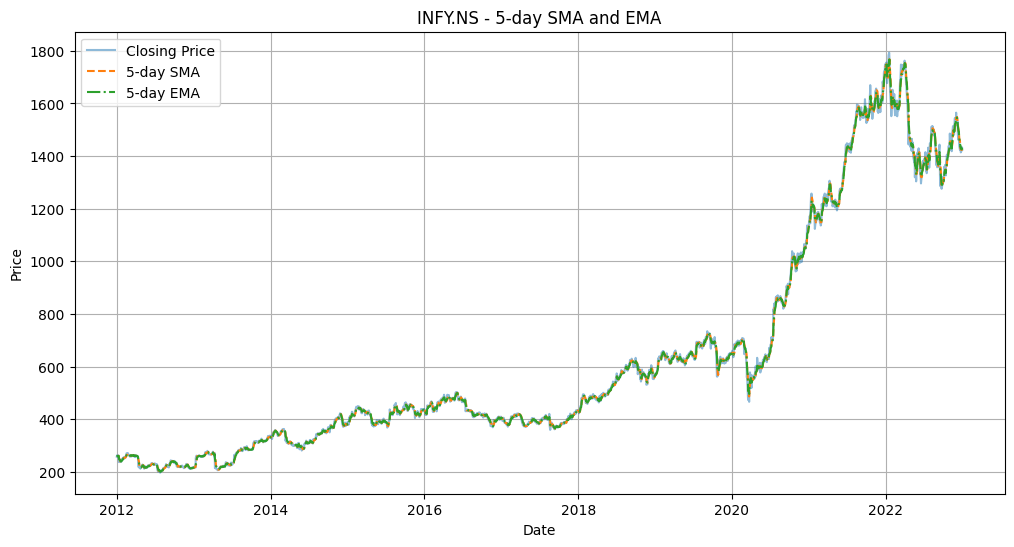

In [ ]:
def plot_sma_ema(df, symbol):
    df['SMA_5'] = df['Close'].rolling(window=5).mean()
    df['EMA_5'] = df['Close'].ewm(span=5, adjust=False).mean()

    plt.figure(figsize=(12, 6))
    plt.plot(df['Close'], label='Closing Price', alpha=0.5)
    plt.plot(df['SMA_5'], label='5-day SMA', linestyle='--')
    plt.plot(df['EMA_5'], label='5-day EMA', linestyle='-.')
    plt.title(f"{symbol} - 5-day SMA and EMA")
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.grid(True)
    plt.show()

# Plot SMA and EMA for each stock
for sym in symbols:
    plot_sma_ema(stock_data[sym], sym)


**MACD**  
   - Plot MACD and Signal line for each of the three stocks.
   - Fast Length (Short-term EMA): 12 periods
   - Slow Length (Long-term EMA): 26 periods
   - Signal Line (Smoothing EMA): 9 periods

    

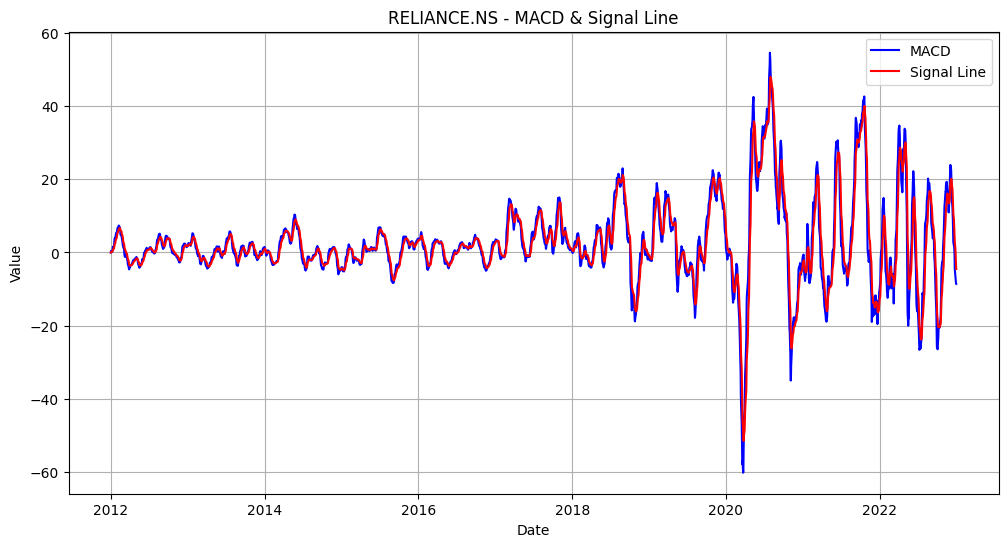

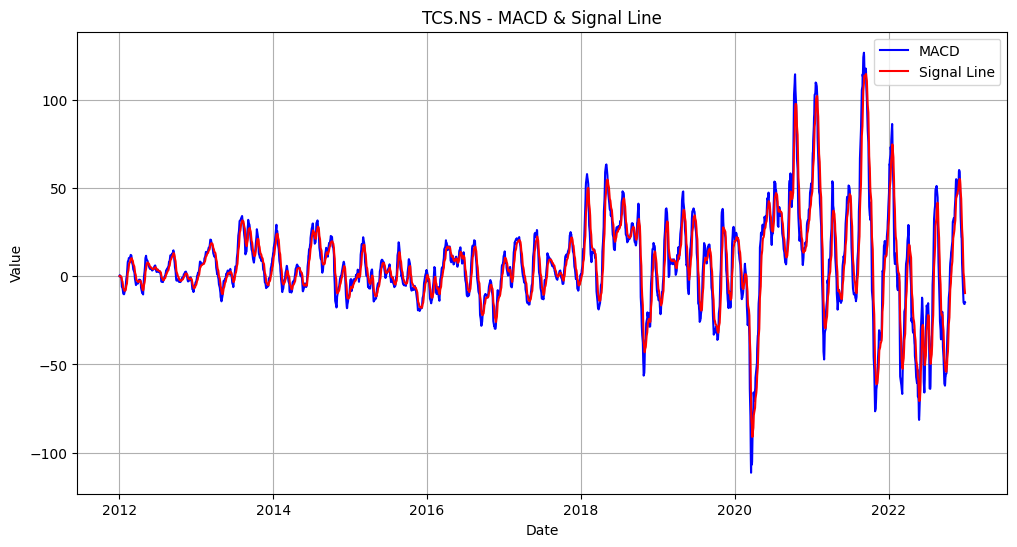

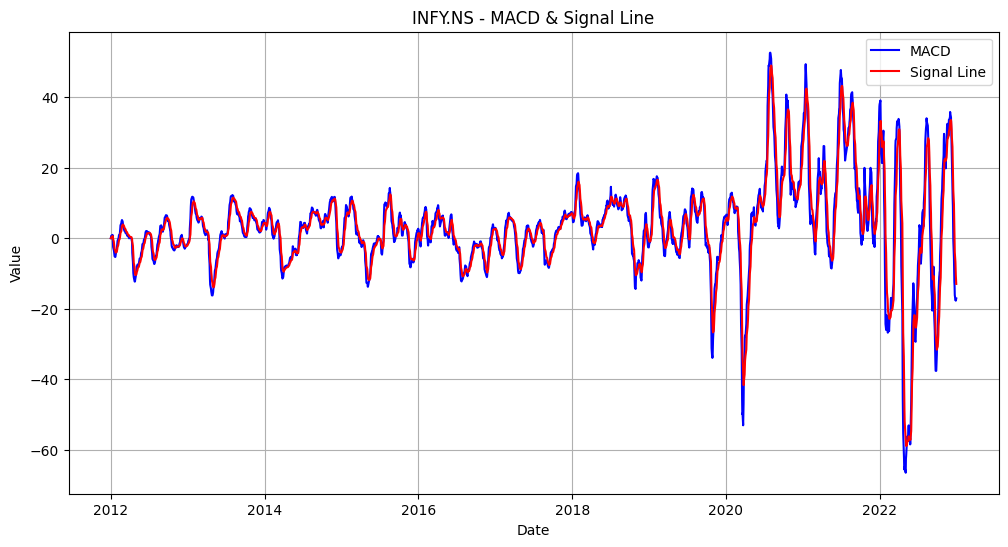

In [ ]:
def plot_macd(df, symbol):
    short_ema = df['Close'].ewm(span=12, adjust=False).mean()
    long_ema = df['Close'].ewm(span=26, adjust=False).mean()
    macd = short_ema - long_ema
    signal = macd.ewm(span=9, adjust=False).mean()

    plt.figure(figsize=(12, 6))
    plt.plot(macd, label='MACD', color='blue')
    plt.plot(signal, label='Signal Line', color='red')
    plt.title(f"{symbol} - MACD & Signal Line")
    plt.xlabel('Date')
    plt.ylabel('Value')
    plt.legend()
    plt.grid(True)
    plt.show()

# Plot MACD for each stock
for sym in symbols:
    plot_macd(stock_data[sym], sym)


**RSI**  
   - Plot RSI for each of the three stocks
   - Period = 14 days
   - Also show the overbought and oversold regions
   - Overbought condition: RSI above 70
   - Oversold condition: RSI below 30
   
    

In [ ]:
def plot_rsi(df, symbol, period=14):
    delta = df['Close'].diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=period).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=period).mean()
    rs = gain / loss
    rsi = 100 - (100 / (1 + rs))

    plt.figure(figsize=(12, 6))
    plt.plot(rsi, label='RSI')
    plt.axhline(70, color='red', linestyle='--', label='Overbought (70)')
    plt.axhline(30, color='green', linestyle='--', label='Oversold (30)')
    plt.title(f"{symbol} - RSI (14-day)")
    plt.xlabel('Date')
    plt.ylabel('RSI')
    plt.legend()
    plt.grid(True)
    plt.show()

# Plot RSI for each stock
for sym in symbols:
    plot_rsi(stock_data[sym], sym)


### Summarize your analysis

In [ ]:
From 2012 to 2022, we studied the daily stock prices of RELIANCE.NS, TCS.NS, and INFY.NS using Python and Yahoo Finance data. We started by plotting each stock’s closing price to understand its overall trend and growth. Then, we used technical indicators like the 5-day Simple Moving Average (SMA) and Exponential Moving Average (EMA) to smooth out short-term price movements and spot trends more clearly. We also looked at the MACD and Signal Line to find points where momentum shifted, which often signal buying or selling opportunities. Finally, we calculated the RSI (Relative Strength Index) to identify when stocks were potentially overbought or oversold. This helped us understand not just how these stocks moved over time, but also when they showed signs of trend reversals or strong momentum.